# Análisis del precio de las Viviendas en Colombia (2019-2020)

Realizado por: Mario E. Otero A.                                          

LinkedIn: https://www.linkedin.com/in/marioeoteroa/         

Github: https://github.com/marioeoteroa/BootcampDSCodigofacilito

Base de Datos tomada de: https://www.kaggle.com/julianusugaortiz/colombia-housing-properties-price

![Picture title](image-20220303-102108.png)
Foto: Getty Images/iStockphoto

El precio de la vivienda en Colombia ha ido aumentando significativamente a lo largo de las 2 ultimas decadas, esto se debe al incremento de inmuebles del segmento de Vivienda de Interés Social (VIS), al aumento de los costos de los materiales, entre otros, además se viene presentando un incremento de entrega de viviendas que las personas han comprado como inversión y destinan estos inmuebles en arriendo. según el más reciente informe de la plataforma inmobiliaria Ciencuadras.                                                                                                            El informe, a su vez, determinó que la mayoría de las viviendas buscadas en Colombia tenían, mínimo, 2 habitaciones, 2 baños y, en general,&nbsp;se encontraban en estratos 2 y 3.&nbsp;     

Tomado de: https://www.portafolio.co/economia/finanzas/cuanto-vale-comprar-vivienda-en-colombia-561210                                        https://www.semana.com/mejor-colombia/articulo/vivienda-una-prioridad-de-inversion-para-los-colombianos/202130/                               

![Picture title](image-20220303-100104.png)

Tomada de: https://www.banrep.gov.co/es/estadisticas/indice-precios-vivienda-nueva-ipvnbr

## Objetivos

### Objetivo General

Estimar el precio de las viviendas en Colombia basados en técnicas de aprendizaje de máquina usando diferentes caracteristicas a partir de un dataset con información de viviendas de los años 2019 y 2020.

### Objetivos específicos

· Evaluar el estado de la base de datos encontrada en Kaggle. 

· Realizar una limpieza y selección de las características que se usarán en los algoritmos.

·&nbsp;Entrenar diferentes algoritmos de aprendizaje de máquina supervisado utilizando las características extraídas del dataset para la estimación de los precios de las viviendas.

·&nbsp;Identificar las caracteristicas y el algoritmo que proporcionan el mejor desempeño en la estimación de los precios de las viviendas a partir de métodos estadísticos. 



## Análisis Exploratorio de Datos

In [ ]:
# Instalar la libreria de geopandas aquí

#!pip install geopandas==0.10.2

In [ ]:
# Importar librerías aquí

import numpy as np 
import pandas as pd 
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

from sklearn.model_selection import cross_validate
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [ ]:
# Importar el dataset (.csv)

dfOriginal = pd.read_csv('/work/co_properties.csv')
dfOriginal.head(5)

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,Z5GURF86+s3KVdbvKdx4dQ==,Propiedad,2020-04-07,2020-05-22,2020-04-07,6.287127,-75.336540,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,9.000000e+07,COP,NaN,Sevende Finca en Chaparrel de San Visent,sevende finca mas 9 lotes en san visente ver...,Otro,Venta
1,EbOqfrqoJKUuVFzkBymDgA==,Propiedad,2020-04-07,2020-05-15,2020-04-07,6.287127,-75.336540,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,4.500000e+08,COP,NaN,Sevende Finca en San Visente An Tioquia 14 et...,sevende finca en san visente aprosimada mente ...,Otro,Venta
2,4et4/CQ6/jiiA31QcGbBSQ==,Propiedad,2020-04-07,2020-05-22,2020-04-07,NaN,NaN,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,2.600000e+09,COP,NaN,Venta de Lote Vereda Puente Pelaez El Retiro _...,"Lote de 145.336 metros, topografia quebrada, c...",Otro,Venta
3,DnzyLOD2CU/exv0dQhVS/A==,Propiedad,2020-04-07,2020-07-02,2020-04-07,6.291447,-75.338812,Colombia,Antioquia,NaN,...,NaN,NaN,NaN,9.500000e+07,COP,NaN,Lote/terreno de 7000 mts2 nacimiento de agua S...,DESCRIPCION\n\nEspectacular oportunidad de neg...,Otro,Venta
4,Pg12IF9sRDSCcWZU6L2yig==,Propiedad,2020-04-07,2020-07-20,2020-04-07,3.457576,-76.558938,Colombia,Valle del Cauca,Cali,...,NaN,NaN,NaN,1.700000e+08,COP,NaN,"322.4 Venta de Lote en Aguacatal, Oeste de Cali",EXCELENTE OPORTUNIDAD PARA INVERSIÓN.\n\nVenta...,Otro,Venta


In [ ]:
#Observar el tamaño del dataset

dfOriginal.shape

(1000000, 25)

In [ ]:
#Observar las columnas que conforman el dataset

dfOriginal.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [ ]:
df = dfOriginal
#Extrar las propiedades que son de tipo Apartamento y Casa
property_types = (df["property_type"] == "Apartamento") | (df["property_type"] == "Casa")
property_types
df = df[property_types]

#Extraer las propiedades que solamente se encuentran en venta
operation_type = (df["operation_type"] == "Venta") 
operation_type
df = df[operation_type]

#df.head(5)
dfbackup = df

In [ ]:
#Eliminar las columnas que no son de interes para el proyecto
columns = df.columns
columns = columns[(columns != "id")&(columns != "start_date")&(columns != "end_date")&(columns != "created_on")&(columns != "l1")&(columns != "l4")&(columns != "l5")&(columns != "l6")&(columns != "l1")&(columns != "title")&(columns != "description")&(columns != "price_period")&(columns != "currency")&(columns != "operation_type")&(columns != "ad_type")&(columns != "rooms")]
df = df[columns]
#df.head(5)

In [ ]:
#Observar el nuevo tamaño del dataset

df.shape

(436179, 10)

In [ ]:
#Renombrar las columnas de Departamento y Ciudad
df = df.rename(columns={'l2':'Department','l3':'City'})
df.columns

Index(['lat', 'lon', 'Department', 'City', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'property_type'],
      dtype='object')

In [ ]:
#Contar la cantidad de datos con información nula
df.isnull().sum()

lat                 70986
lon                 70986
Department              0
City                23041
bedrooms           306281
bathrooms           39898
surface_total      360596
surface_covered    352312
price                1317
property_type           0
dtype: int64

In [ ]:
#Remover todas las filas que presenten datos nulos
df.dropna(inplace = True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.isnull().sum()

lat                0
lon                0
Department         0
City               0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

In [ ]:
#Observar el tamaño del dataset sin datos nulos
df_filtrado = df
df_filtrado.shape

(16568, 10)

In [ ]:
#Filtrar nuevamente el dataset para eliminar datos incorrectos

df_filtrado = df_filtrado[df_filtrado["price"] > 10000000]

df_filtrado = df_filtrado[df_filtrado["price"] < 1000000001]

df_filtrado = df_filtrado[df_filtrado["surface_total"] < 2000]

df_filtrado = df_filtrado[df_filtrado["surface_covered"] < 1000]

df_filtrado = df_filtrado[df_filtrado["bedrooms"] > -1]

df_filtrado = df_filtrado[df_filtrado["bathrooms"] > -1]

df_filtrado = df_filtrado[df_filtrado["surface_total"] > 0]

df_filtrado = df_filtrado[df_filtrado["surface_covered"] > 0]

In [ ]:
#Añadir una columna con el calculo de una nueva caracteristica
df_filtrado['P/sqmtr'] = df_filtrado['price'] // df_filtrado['surface_total']

In [ ]:
#Observar que se alla agregado la nueva columna
df_filtrado.shape

(13803, 11)

In [ ]:
#Guardar el .csv que corresponde al dataset filtrado con el que se va a trabajar
#df_filtrado.to_csv('df_filtrado.csv')

In [ ]:
#Leer el data set y observar qué columnas lo componen
df_filtrado = pd.read_csv('/work/df_filtrado.csv')
df_filtrado.head(5)

,Unnamed: 0,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,P/sqmtr
0,0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,Apartamento,2947368.0
1,2,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,Apartamento,6480000.0
2,3,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,Apartamento,5439560.0
3,4,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,Apartamento,3500000.0
4,5,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,Apartamento,4064516.0


In [ ]:
df_filtrado.head(5)


,Unnamed: 0,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,P/sqmtr
0,0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,Apartamento,2947368.0
1,2,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,Apartamento,6480000.0
2,3,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,Apartamento,5439560.0
3,4,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,Apartamento,3500000.0
4,5,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,Apartamento,4064516.0


In [ ]:
#Eliminar una columna indeseada
columns = df_filtrado.columns
columns = columns[(columns != "Unnamed: 0")]
df_filtrado = df_filtrado[columns]

In [ ]:
df_filtrado.shape

(13803, 11)

In [ ]:
df_filtrado.head(10)

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,P/sqmtr
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,Apartamento,2947368.0
1,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,Apartamento,6480000.0
2,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,Apartamento,5439560.0
3,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,Apartamento,3500000.0
4,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,Apartamento,4064516.0
5,4.723,-74.039,Cundinamarca,Bogotá D.C,3.0,3.0,93.0,93.0,500000000.0,Apartamento,5376344.0
6,4.753,-74.069,Cundinamarca,Bogotá D.C,5.0,4.0,149.0,167.0,850000000.0,Casa,5704697.0
7,3.438,-76.536,Valle del Cauca,Cali,4.0,2.0,300.0,300.0,600000000.0,Casa,2000000.0
8,3.576,-76.489,Valle del Cauca,Yumbo,2.0,2.0,60.0,120.0,170000000.0,Casa,2833333.0
9,3.255,-76.540,Valle del Cauca,Jamundí,3.0,2.0,113.0,98.0,330000000.0,Casa,2920353.0


## Visualización efectiva de Datos

In [ ]:
#Mostrar el tamaño del dataset filtrado con el que se va a trabajar el proyecto
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Indicator(mode = "number", value = df_filtrado.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
fig.add_trace(go.Indicator(mode = "number", value = df_filtrado.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
fig.show()

### ¿Donde están ubicadas las viviendas?

In [ ]:
#Generar el mapa original
m_5 = folium.Map(location=[5.170035, -74.914305], tiles='cartodbpositron', zoom_start=6)

# Añadir el mapa de calor con las cordenadas al mapa original
HeatMap(data=df_filtrado[['lat', 'lon']], radius=10).add_to(m_5)

# Mostrar el mapa
m_5

In [ ]:
df_filtrado.Department

0                 Atlántico
1              Cundinamarca
2           Valle del Cauca
3           Valle del Cauca
4           Valle del Cauca
                ...        
13798       Valle del Cauca
13799       Valle del Cauca
13800    Norte de Santander
13801       Valle del Cauca
13802          Cundinamarca
Name: Department, Length: 13803, dtype: object

In [ ]:
#Se organizan los departamentos por la cantidad de viviendas en venta
Departamentos = df_filtrado['Department'].value_counts().reset_index()
Departamentos.columns = ['Department', 'counts']
Departamentos

,Department,counts
0,Cundinamarca,4256
1,Valle del Cauca,3870
2,Antioquia,2495
3,Atlántico,1925
4,Risaralda,385
5,Norte de Santander,221
6,Santander,214
7,Quindío,189
8,Bolívar,59
9,Tolima,53


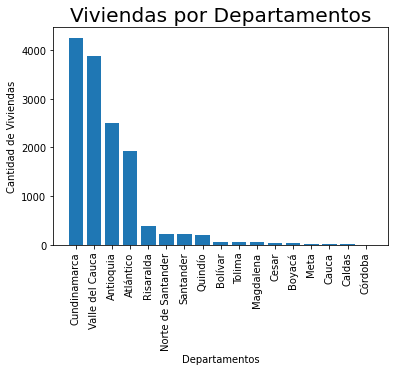

In [ ]:
#Graficar viviendas en venta por departamentos
x = Departamentos['Department']#Aplicamos slicing como en una lista de Python.
y = Departamentos['counts']

plt.bar(x, y)
plt.style.use("fivethirtyeight")

plt.title('Viviendas por Departamentos')
plt.xlabel('Departamentos')
plt.ylabel('Cantidad de Viviendas')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()


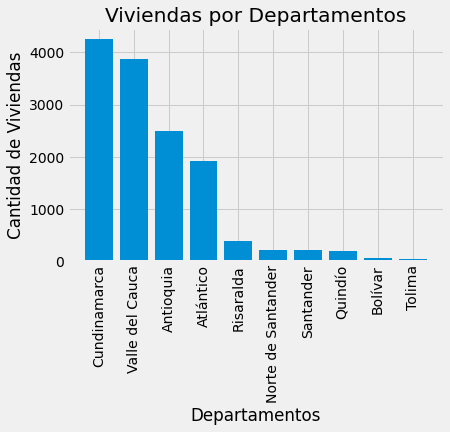

In [ ]:
x = Departamentos['Department'][0:10]#Aplicamos slicing como en una lista de Python.
y = Departamentos['counts'][0:10]

plt.bar(x, y)
plt.title('Viviendas por Departamentos')
plt.xlabel('Departamentos')
plt.ylabel('Cantidad de Viviendas')
plt.xticks(rotation='vertical') #Método que se usa para rotar el texto de los puntos en X para que no se amontonen.
plt.show()

### ¿Qué tipos de vivienda se ofrecen?

In [ ]:
df_filtrado.property_type

0        Apartamento
1        Apartamento
2        Apartamento
3        Apartamento
4        Apartamento
            ...     
13798           Casa
13799           Casa
13800           Casa
13801           Casa
13802           Casa
Name: property_type, Length: 13803, dtype: object

In [ ]:
#Se halla la cantidad de cada uno de los tipos de vivienda
TipoVivienda = df_filtrado['property_type'].value_counts().reset_index()
TipoVivienda.columns = ['property_type', 'counts']
TipoVivienda

,property_type,counts
0,Apartamento,9328
1,Casa,4475


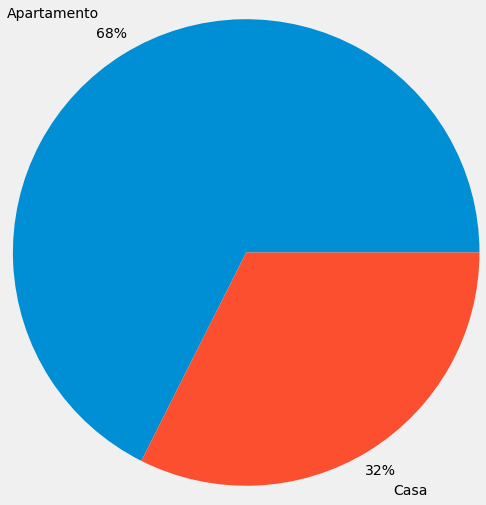

In [ ]:
#Graficar el porcentaje de tipos de vivienda que hay
plt.pie(TipoVivienda['counts'],labels = TipoVivienda['property_type'], autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2,radius=2.5);

### Precios de la vivienda en Colombia

In [ ]:
#Se organizan los precios de las viviendas
Precios = df_filtrado['price']
Precios = df_filtrado.sort_values('price', ascending=0)
#Precios.head(100)

In [ ]:
#Calculo del Rango de Precios
RangoPrecios = max(Precios['price']) - min(Precios['price'])
RangoPrecios

972000000.0

In [ ]:
#Precio máximo
max(Precios['price'])

1000000000.0

In [ ]:
#Precio minimo
min(Precios['price'])

28000000.0

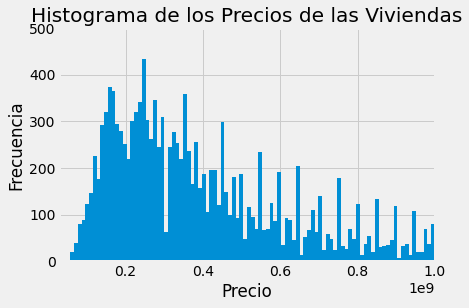

In [ ]:
#Graficar histograma con la frecuencia de los precios de las viviendas
plt.hist(Precios['price'], bins=100)

plt.grid(True)
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de los Precios de las Viviendas')
plt.xlim(28000000, 1000000000)
plt.ylim(0,500)
plt.show()

In [ ]:
#Organización de la media del precio del metro cuadrado por departamento
sp = df_filtrado[['Department','P/sqmtr']].groupby(['Department']).agg(['mean'])
sp.columns=['Media del Precio del Metro Cuadrado']

sp = sp.nlargest(30, ['Media del Precio del Metro Cuadrado']) 

sp

,Media del Precio del Metro Cuadrado
Department,
Cundinamarca,4.822493e+06
Bolívar,4.319058e+06
Magdalena,4.131218e+06
Antioquia,3.565034e+06
Boyacá,3.330059e+06
Atlántico,3.037159e+06
Caldas,2.909760e+06
Valle del Cauca,2.810802e+06
Santander,2.719460e+06


<AxesSubplot:xlabel='Department'>

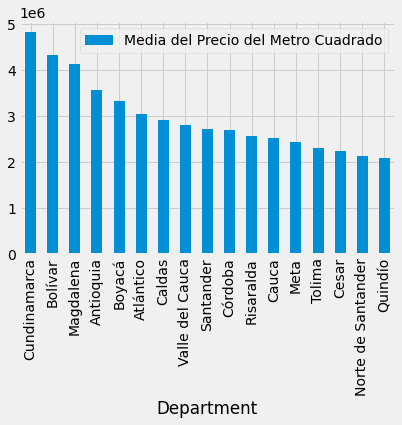

In [ ]:
sp.plot.bar()

### Relaciones vs Precio de la Vivienda

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

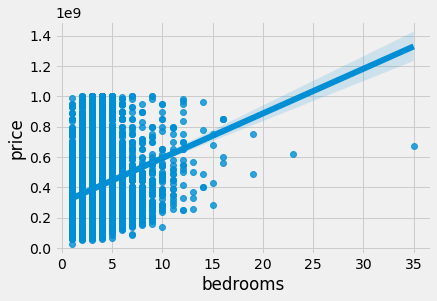

In [ ]:
#Graficar relación existente entre la cantidad de cuartos y el precio de la vivienda
sns.regplot(x = df_filtrado['bedrooms'], y = df_filtrado['price'])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

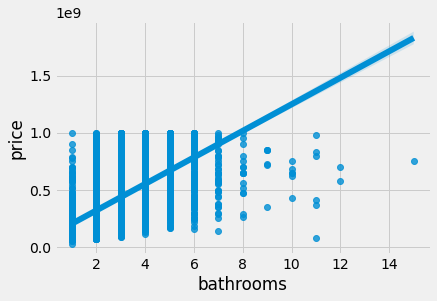

In [ ]:
#Graficar relación existente entre la cantidad de baños y el precio de la vivienda
sns.regplot(x = df_filtrado['bathrooms'], y = df_filtrado['price'])

<AxesSubplot:xlabel='surface_total', ylabel='price'>

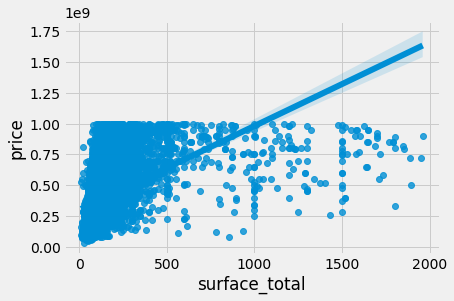

In [ ]:
#Graficar relación existente entre la superficie total y el precio de la vivienda
sns.regplot(x = df_filtrado['surface_total'], y = df_filtrado['price'])

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



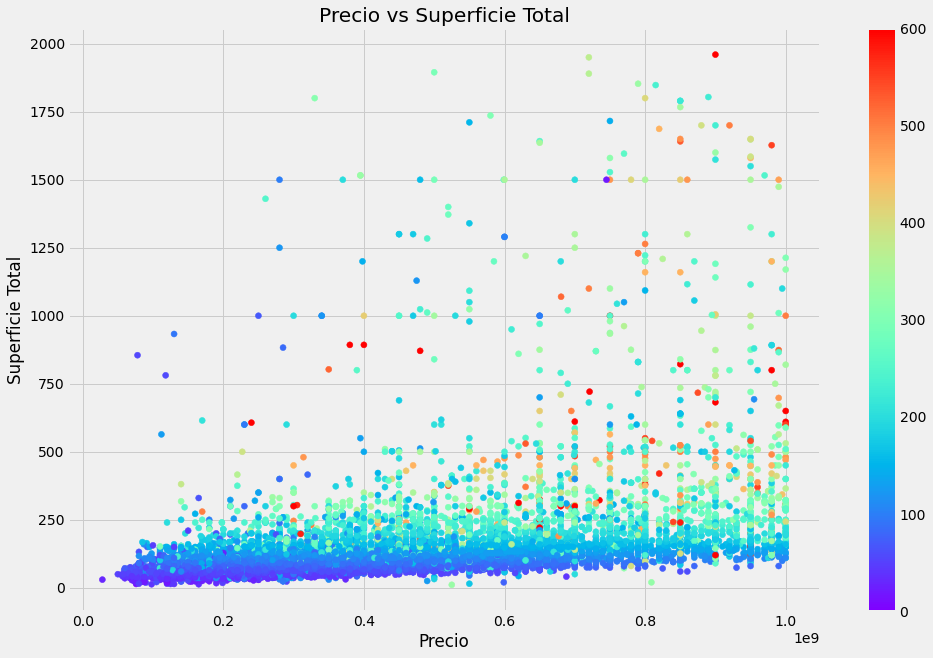

In [ ]:
#Graficar la relación existente entre el precio y la superficie total de la vivienda

x = df_filtrado['price']
y = df_filtrado['surface_total']

fig, ax = plt.subplots(figsize=(15, 10))

cmap = plt.cm.rainbow
norm = plt.Normalize(vmin=0, vmax=600)

color=cmap(norm(df_filtrado["surface_covered"].values))

plt.scatter(x, y, color = color)
plt.title('Precio vs Superficie Total')
plt.xlabel('Precio')
plt.ylabel('Superficie Total')
#ax.set_xlim(0,15000000000)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  
fig.colorbar(sm)

plt.show()

<AxesSubplot:>

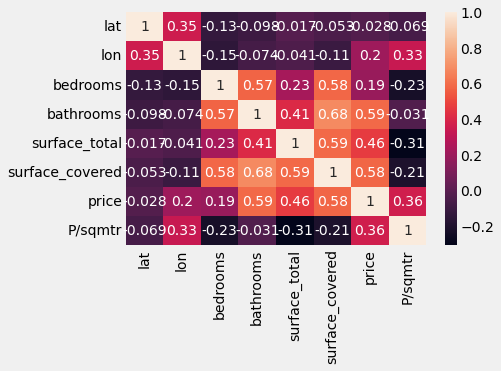

In [ ]:
#Graficar un mapa de calor con la correlación existente entre las diferentes variables
sns.heatmap(df_filtrado.corr(), annot = True)


## Modelado de Datos

In [ ]:
df_filtrado

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,P/sqmtr
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,Apartamento,2947368.0
1,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,Apartamento,6480000.0
2,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,Apartamento,5439560.0
3,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,Apartamento,3500000.0
4,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,Apartamento,4064516.0
...,...,...,...,...,...,...,...,...,...,...,...
13798,3.367,-76.540,Valle del Cauca,Cali,4.0,5.0,120.0,300.0,980000000.0,Casa,8166666.0
13799,3.436,-76.505,Valle del Cauca,Cali,5.0,1.0,116.0,116.0,170000000.0,Casa,1465517.0
13800,7.838,-72.474,Norte de Santander,Villa del Rosario,5.0,3.0,65.0,70.0,180000000.0,Casa,2769230.0
13801,3.482,-76.519,Valle del Cauca,Cali,5.0,4.0,290.0,320.0,350000000.0,Casa,1206896.0


In [ ]:
#Convertir en variable númerica la variable categorica de tipo de vivienda

dfnew = pd.get_dummies(df_filtrado, columns=['property_type'],drop_first=True, dtype=float)
dfnew

dfnew = dfnew.rename(columns={'property_type_Casa':'property_type',})
dfnew

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,P/sqmtr,property_type
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,2947368.0,0.0
1,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,6480000.0,0.0
2,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,5439560.0,0.0
3,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,3500000.0,0.0
4,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,4064516.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13798,3.367,-76.540,Valle del Cauca,Cali,4.0,5.0,120.0,300.0,980000000.0,8166666.0,1.0
13799,3.436,-76.505,Valle del Cauca,Cali,5.0,1.0,116.0,116.0,170000000.0,1465517.0,1.0
13800,7.838,-72.474,Norte de Santander,Villa del Rosario,5.0,3.0,65.0,70.0,180000000.0,2769230.0,1.0
13801,3.482,-76.519,Valle del Cauca,Cali,5.0,4.0,290.0,320.0,350000000.0,1206896.0,1.0


In [ ]:
dfnew.reset_index(drop=True, inplace=True)
dfnew

,lat,lon,Department,City,bedrooms,bathrooms,surface_total,surface_covered,price,P/sqmtr,property_type
0,11.006,-74.808,Atlántico,Barranquilla,2.0,2.0,95.0,95.0,280000000.0,2947368.0,0.0
1,4.689,-74.050,Cundinamarca,Bogotá D.C,2.0,3.0,125.0,125.0,810000000.0,6480000.0,0.0
2,3.446,-76.551,Valle del Cauca,Cali,3.0,2.0,91.0,91.0,495000000.0,5439560.0,0.0
3,3.383,-76.537,Valle del Cauca,Cali,3.0,2.0,100.0,100.0,350000000.0,3500000.0,0.0
4,3.437,-76.548,Valle del Cauca,Cali,3.0,3.0,155.0,139.0,630000000.0,4064516.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
13798,3.367,-76.540,Valle del Cauca,Cali,4.0,5.0,120.0,300.0,980000000.0,8166666.0,1.0
13799,3.436,-76.505,Valle del Cauca,Cali,5.0,1.0,116.0,116.0,170000000.0,1465517.0,1.0
13800,7.838,-72.474,Norte de Santander,Villa del Rosario,5.0,3.0,65.0,70.0,180000000.0,2769230.0,1.0
13801,3.482,-76.519,Valle del Cauca,Cali,5.0,4.0,290.0,320.0,350000000.0,1206896.0,1.0


In [ ]:
dfnew.columns

Index(['lat', 'lon', 'Department', 'City', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'P/sqmtr',
       'property_type'],
      dtype='object')

In [ ]:
#Seleccionar las caracteristicas usadas para realizar los modelos
train_features = dfnew[['bedrooms','bathrooms','surface_total','surface_covered','P/sqmtr','property_type']]
train_features.head(5)

,bedrooms,bathrooms,surface_total,surface_covered,P/sqmtr,property_type
0,2.0,2.0,95.0,95.0,2947368.0,0.0
1,2.0,3.0,125.0,125.0,6480000.0,0.0
2,3.0,2.0,91.0,91.0,5439560.0,0.0
3,3.0,2.0,100.0,100.0,3500000.0,0.0
4,3.0,3.0,155.0,139.0,4064516.0,0.0


In [ ]:
#Seleccionar el objetivo a estimar de los modelos
targets = dfnew[['price']]
targets.head(5)

,price
0,280000000.0
1,810000000.0
2,495000000.0
3,350000000.0
4,630000000.0


In [ ]:
X = train_features

#Selecciono target
y = targets

### Linear regression

In [ ]:
#Con un ciclo for busco el modelo de regresión lineal que mejor desempeño presenta
ScorePrecision = []
for j in range(0,1):
    for i in range(0,5):

        
        #Selecciono predictores
        X = train_features.iloc[:,i]
        
        
        #Selecciono target
        y = targets.iloc[:,j]    
        
        from sklearn.model_selection import train_test_split
        #separo datos de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
        
        
        X_train = X_train.values.reshape(-1,1)
        X_test = X_test.values.reshape(-1,1)
        ## se escalan los datos
        # from sklearn.preprocessing import MinMaxScaler
        # escalar = MinMaxScaler(feature_range=(-1,1))
        # X_train = escalar.fit_transform(X_train)
        # X_test = escalar.fit_transform(X_test)
        
        #MODELO DE REGRESION LINEAL SIMPLE
        
        from sklearn import linear_model
        
        LR_simple = linear_model.LinearRegression()
        
        #Entreno el modelo
        LR_simple.fit(X_train,y_train)
        
        #Realizo una prediccion
        y_pred = LR_simple.predict(X_test)
        
        #Verifico precisión del modelo
        precision = LR_simple.score(X_train,y_train)
        ScorePrecision.append(precision)
        # print('MODELO DE REGRESION LINEAL SIMPLE #' + str(i))
        # print('Precision del modelo (R^2):', precision)
    
    mejor = max(ScorePrecision)
    posmejor = ScorePrecision.index(mejor)
        
    print('-------------------------------')
    print('Modelo con Mayor Precision (R^2) es:', posmejor)
    print('La Precision (R^2) es:', mejor)
    print('-------------------------------')

-------------------------------
Modelo con Mayor Precision (R^2) es: 1
La Precision (R^2) es: 0.3445607863599959
-------------------------------


In [ ]:
ScorePrecision

[0.03682293575190354,
 0.3445607863599959,
 0.21022123479658905,
 0.3326538548223871,
 0.14078883066692605]

Para la regresión lineal simple la caracteristica que mejor estima el precio de la vivienda es la cantidad de baños con un  coeficiente R^2 de 0.335

### Multiple linear regression

In [ ]:
#Con un ciclo for busco el modelo de regresión lineal multiple que mejor desempeño presenta
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

ScorePrecision = []
precision = []
precisionnew = []
RMSETrain = []
RMSETest  = []
R2Train = []
R2Test  = []
MSETrain = []
MSETest  = []
MAETrain = []
MAETest  = []
TablaVarios  = []


variables = 6
for q in range(2,variables):
    for j in range(0,1):
            # Loading the data.
            
            #Selecciono predictores
            X = train_features.iloc[:,0:q].to_numpy()
                       
            #Selecciono target
            y = targets.iloc[:,j].to_numpy()
        
            #separo datos de entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4444)
            
            ## se escalan los datos
            escalar = MinMaxScaler(feature_range=(-1,1))
            X_train = escalar.fit_transform(X_train)
            X_test = escalar.fit_transform(X_test)
            
            #MODELO DE REGRESION LINEAL SIMPLE
            LR_multiple = linear_model.LinearRegression(n_jobs=-1)
            
            #Entreno el modelo
            LR_multiple.fit(X_train,y_train)
            
            #Realizo una prediccion
            y_pred = LR_multiple.predict(X_test)
            
            y_train_pred = LR_multiple.predict(X_train)
            y_test_pred = LR_multiple.predict(X_test)
            
            #Verifico precisión del modelo
            precision = LR_multiple.score(X_train,y_train)
            ScorePrecision.append(precision)
            
            #RMSE root_mean_squared_error
            RMSETrainF = mean_squared_error(y_train, y_train_pred, squared=False)
            RMSETestF = mean_squared_error(y_test, y_test_pred, squared=False)
            
            RMSETrain.append(RMSETrainF)
            RMSETest.append(RMSETestF)
    
            RMSETrainFinal = pd.DataFrame(RMSETrain)
            RMSETestFinal = pd.DataFrame(RMSETest)
            
            #r2 score
            R2TrainF = r2_score(y_train, y_train_pred)
            R2TestF = r2_score(y_test, y_test_pred)
            
            R2Train.append(R2TrainF)
            R2Test.append(R2TestF)
    
            R2TrainFinal = pd.DataFrame(R2Train)
            R2TestFinal = pd.DataFrame(R2Test)
            
            #MSE mean_squared_error
            MSETrainF = mean_squared_error(y_train, y_train_pred, squared=True)
            MSETestF = mean_squared_error(y_test, y_test_pred, squared=True)
            
            MSETrain.append(MSETrainF)
            MSETest.append(MSETestF)
    
            MSETrainFinal = pd.DataFrame(MSETrain)
            MSETestFinal = pd.DataFrame(MSETest)
            
            #MAE mean_absolute_error
            MAETrainF = mean_absolute_error(y_train, y_train_pred)
            MAETestF = mean_absolute_error(y_test, y_test_pred)
            
            MAETrain.append(MAETrainF)
            MAETest.append(MAETestF)
    
            MAETrainFinal = pd.DataFrame(MAETrain)
            MAETestFinal = pd.DataFrame(MAETest)
                                      
            RMSE1= pd.concat([RMSETrainFinal,RMSETestFinal], axis=1)
            R21 = pd.concat([R2TrainFinal,R2TestFinal], axis=1)
            MSE1= pd.concat([MSETrainFinal,MSETestFinal], axis=1)
            MAE1= pd.concat([MAETrainFinal,MAETestFinal], axis=1)
    
            
            tabla1 = pd.concat([R21,RMSE1,MSE1,MAE1], axis=1)

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

mejor = max(R2Train)
posmejor = R2Train.index(mejor)+1
mejor2 = max(R2Test)
posmejor2 = R2Test.index(mejor2)+1
tablaMLR.columns = ['R2Train','R2Test','RMSETrain','RMSETest','MSETrain','MSETest','MAETrain','MAETest']

-------------------INICIO PROCESAMIENTO-----------------
--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 0.003441111246744792 Minutos ---


In [ ]:
tablaMLR.head()

,R2Train,R2Test,RMSETrain,RMSETest,MSETrain,MSETest,MAETrain,MAETest
0,0.381049,0.303116,1.764935e+08,1.889982e+08,3.114996e+16,3.572031e+16,1.350203e+08,1.394391e+08
1,0.439771,0.358285,1.679127e+08,1.813630e+08,2.819466e+16,3.289253e+16,1.275297e+08,1.314354e+08
2,0.489753,0.272971,1.602473e+08,1.930426e+08,2.567921e+16,3.726546e+16,1.205460e+08,1.376902e+08
3,0.701297,0.629587,1.226085e+08,1.377909e+08,1.503284e+16,1.898633e+16,8.022557e+07,9.544046e+07


Para la regresión lineal multiple las caracteristicas que mejor estiman el precio de la vivienda son la cantidad de cuartos, cantidad de baños, la superficie total de la vivienda y la superficie cubierta de la vivienda, con un  coeficiente R^2 de 0.701

### Decision Tree

In [ ]:
#Se definen los hiperparametros a optimizar
max_depth = 10
minsamplesplit = 20
minsampleleaf = 20

param_grid = {"model__max_depth": list(range(1, max_depth + 1)),
              "model__min_samples_split": list(range(1, minsamplesplit + 1)),
              "model__min_samples_leaf": list(range(1, minsampleleaf + 1))
                                        }

In [ ]:
#Se realiza una optimización de hiperparametros con 10 validaciones cruzadas
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

# Train, test split.
data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
X_train, X_test, targets_train, targets_test = data_split

# Find the best model per target.
for target in range(targets.shape[1]):
    # Getting the target.
    y_train = targets_train.iloc[:, target]
    y_test = targets_test.iloc[:, target]

    # Model definition.
    pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", DecisionTreeRegressor(random_state=4444))])
    # By default GridSearchCV uses a 5-kfold validation strategy.
    search = GridSearchCV(pipe, param_grid, cv=10, n_jobs=-1)  
    search.fit(X_train.values, y_train.values)

    # Getting the test score.
    y_hat_test = search.predict(X_test.values)
    test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
    print(f"Columna: {targets.columns[target]}")
    print(f"Best CV score: {search.best_score_:0.3f}")
    print(f"Test score: {test_score:0.3f}")
    print(f"Best Parameters:\n {search.best_params_}")
    print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
Columna: price
Best CV score: 0.987
Test score: 0.990
Best Parameters:
 {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 2.168781594435374 Minutos ---
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


2000 fits failed out of a total of 40000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "/shared-libs/python3.7/py/lib/python

-------------------INICIO PROCESAMIENTO-----------------
Columna: price
Best CV score: 0.987
Test score: 0.990
Best Parameters:
 {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 2.127672537167867 Minutos ---

In [ ]:
#Se definen los hiperparametros optimos encontrados
maxdepth1 = 10
minsampleleaf1 = 1
minsamplesplit1 = 5

TiempoEntrenamientoTRAIN=[]
TiempoEvaluacionTRAIN=[]
RMSETrain=[]
R2Train=[]
MSETrain=[]
MAETrain=[]

TiempoEntrenamientoTEST=[]
TiempoEvaluacionTEST=[]
RMSETest=[]
R2Test=[]
MSETest=[]
MAETest=[]

In [ ]:
#Se generan los modelos con el algoritmo elegido y calculan las metricas de evaluación
import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

X = train_features

#Selecciono target
y = targets

#separo datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4444)

## se escalan los datos
# escalar = MinMaxScaler(feature_range=(-1,1))
# X_train = escalar.fit_transform(X_train)
# X_test = escalar.fit_transform(X_test)
#MODELO DE REGRESION LINEAL SIMPLE
LR_simple = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", DecisionTreeRegressor(max_depth=maxdepth1,
                                 min_samples_leaf=minsampleleaf1,
                                 min_samples_split=minsamplesplit1,
                                 random_state=4444))])

# LR_simple.fit(X_train, y_train)
# LR_simple = RandomForestRegressor(max_depth=maxdepth1,n_estimators=nestimators,min_samples_leaf=minsampleleaf1,min_samples_split=minsamplesplit1,random_state=4444,n_jobs=-1)
scoring = ['r2','neg_root_mean_squared_error','neg_mean_squared_error','neg_mean_absolute_error']

###Con datos de Train
scores1 = cross_validate(LR_simple, X_train, y_train, scoring=scoring, n_jobs=-1, cv=10)
TiempoPromedioEntrenamientoTRAIN = mean(scores1['fit_time'])
TiempoPromedioEvaluacionTRAIN = mean(scores1['score_time'])
RMSEPromedioTRAIN = mean(scores1['test_neg_root_mean_squared_error'])
R2PromedioTRAIN = mean(scores1['test_r2'])
MSEPromedioTRAIN = mean(scores1['test_neg_mean_squared_error'])
MAEPromedioTRAIN = mean(scores1['test_neg_mean_absolute_error'])
TiempoEntrenamientoTRAIN.append(TiempoPromedioEntrenamientoTRAIN)
TiempoEvaluacionTRAIN.append(TiempoPromedioEvaluacionTRAIN)
RMSETrain.append(RMSEPromedioTRAIN)
R2Train.append(R2PromedioTRAIN)
MSETrain.append(MSEPromedioTRAIN)
MAETrain.append(MAEPromedioTRAIN)

RMSETrainFinal=pd.DataFrame(RMSETrain)
R2TrainFinal=pd.DataFrame(R2Train)
MSETrainFinal=pd.DataFrame(MSETrain)
MAETrainFinal=pd.DataFrame(MAETrain)

###Con datos de Test
scores2 = cross_validate(LR_simple, X_test, y_test, scoring=scoring, n_jobs=-1, cv=10)

# # Getting the test score.
# y_hat_test = LR_simple.predict(X_test)
# test_score = r2_score(y_test, y_hat_test)

TiempoPromedioEntrenamientoTEST = mean(scores2['fit_time'])
TiempoPromedioEvaluacionTEST = mean(scores2['score_time'])
RMSEPromedioTEST = mean(scores2['test_neg_root_mean_squared_error'])
R2PromedioTEST = mean(scores2['test_r2'])
MSEPromedioTEST = mean(scores2['test_neg_mean_squared_error'])
MAEPromedioTEST = mean(scores2['test_neg_mean_absolute_error'])
TiempoEntrenamientoTEST.append(TiempoPromedioEntrenamientoTEST)
TiempoEvaluacionTEST.append(TiempoPromedioEvaluacionTEST)
RMSETest.append(RMSEPromedioTEST)
R2Test.append(R2PromedioTEST)
MSETest.append(MSEPromedioTEST)
MAETest.append(MAEPromedioTEST)

RMSETestFinal=pd.DataFrame(RMSETest)
R2TestFinal=pd.DataFrame(R2Test)
MSETestFinal=pd.DataFrame(MSETest)
MAETestFinal=pd.DataFrame(MAETest)

RMSE1 = pd.concat([RMSETrainFinal,RMSETestFinal], axis=1)
R21 = pd.concat([R2TrainFinal,R2TestFinal], axis=1)
MSE1= pd.concat([MSETrainFinal,MSETestFinal], axis=1)
MAE1= pd.concat([MAETrainFinal,MAETestFinal], axis=1)
####Creacion Tablas    
tabla1 = pd.concat([R21,RMSE1,MSE1,MAE1], axis=1)
tabla1.columns = ['R2Train','R2Test','RMSETrain','RMSETest','MSETrain','MSETest','MAETrain','MAETest']

-------------------INICIO PROCESAMIENTO-----------------


In [ ]:
tabla1.head()

,R2Train,R2Test,RMSETrain,RMSETest,MSETrain,MSETest,MAETrain,MAETest
0,0.986894,0.97953,-2.553644e+07,-3.174452e+07,-6.581233e+14,-1.037870e+15,-1.209572e+07,-1.548727e+07


Para los arboles de decisión los hiperparametros que mejor estiman el precio de la vivienda son: maxdepth&nbsp;=&nbsp;10, minsampleleaf&nbsp;=&nbsp;1, minsamplesplit&nbsp;=&nbsp;5, con un  coeficiente R^2 de 0.979

### Random Forest

In [ ]:
#Se definen los hiperparametros a optimizar

param_gride = {"model__max_depth": [5,10,15,20],"model__min_samples_split": [5,10,15,20],"model__min_samples_leaf": [5,10,15,20],"model__n_estimators": [100]}
#param_gride = {"model__max_depth": [5,10,20],"model__min_samples_split": [5,10,20],"model__min_samples_leaf": [5,10,20],"model__n_estimators": [100]}
#param_gride = {"model__max_depth": [5,20],"model__min_samples_split": [5,10],"model__min_samples_leaf": [5,10,20],"model__n_estimators": [100]}
#param_gride = {"model__max_depth": [5],"model__min_samples_split": [5],"model__min_samples_leaf": [5],"model__n_estimators": [100]}

# param_gride = {"model__max_depth": [10,20,30,40,50,60,70,80,90,100],
#               "model__min_samples_split": [2,4,6,8,10,12,14,16,18,20],
#               "model__min_samples_leaf": [1,2,3,4,5,6,7,8,9,10],
#               "model__n_estimators": [100,200,300,400,500,600,700,800,900,1000]

                              

In [ ]:
#Se realiza una optimización de hiperparametros con 10 validaciones cruzadas

import time
start_time = time.time()
print('-------------------INICIO PROCESAMIENTO-----------------')


# Train, test split.
data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
X_train, X_test, targets_train, targets_test = data_split

# Find the best model per target.
for target in range(targets.shape[1]):
    # Getting the target.
    y_train = targets_train.iloc[:, target]
    y_test = targets_test.iloc[:, target]

    # Model definition.
    pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", RandomForestRegressor(random_state=4444,n_jobs=-1))])
    # By default GridSearchCV uses a 5-kfold validation strategy.
    search = GridSearchCV(estimator=pipe, param_grid = param_gride, cv=10, n_jobs=-1)  
    search.fit(X_train.values, y_train.values)

    # Getting the test score.
    y_hat_test = search.predict(X_test.values)
    test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
    print(f"Columna: {targets.columns[target]}")
    print(f"Best CV score: {search.best_score_:0.3f}")
    print(f"Test score: {test_score:0.3f}")
    print(f"Best Parameters:\n {search.best_params_}")
    print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
Columna: price
Best CV score: 0.995
Test score: 0.996
Best Parameters:
 {'model__max_depth': 20, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 100}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 3.8578356504440308 Minutos ---


-------------------INICIO PROCESAMIENTO-----------------
Columna: price
Best CV score: 0.995
Test score: 0.996
Best Parameters:
 {'model__max_depth': 20, 'model__min_samples_leaf': 5, 'model__min_samples_split': 5, 'model__n_estimators': 100}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 4.091889691352844 Minutos ---

In [ ]:
#Se definen los hiperparametros optimos encontrados
maxdepth1 = 20
minsampleleaf1 = 5
minsamplesplit1 = 5
nestimators = 100

TiempoEntrenamientoTRAIN=[]
TiempoEvaluacionTRAIN=[]
RMSETrain=[]
R2Train=[]
MSETrain=[]
MAETrain=[]

TiempoEntrenamientoTEST=[]
TiempoEvaluacionTEST=[]
RMSETest=[]
R2Test=[]
MSETest=[]
MAETest=[]



In [ ]:
X = train_features

#Selecciono target
y = targets
        
#separo datos de entrenamiento y prueba
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size = 0.3, random_state=4444)

## se escalan los datos
# escalar = MinMaxScaler(feature_range=(-1,1))
# X_train = escalar.fit_transform(X_train)
# X_test = escalar.fit_transform(X_test)
#MODELO DE RANDOM FOREST REGRESSOR
LR_simple1 = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", RandomForestRegressor(max_depth=maxdepth1,
                                 n_estimators=nestimators,
                                 min_samples_leaf=minsampleleaf1,
                                 min_samples_split=minsamplesplit1,
                                 random_state=4444,n_jobs=-1))])

In [ ]:
#Se generan los modelos con el algoritmo elegido y calculan las metricas de evaluación
LR_simple1.fit(X_train1, y_train1.values.ravel())
#LR_simple = RandomForestRegressor(max_depth=maxdepth1,n_estimators=nestimators,min_samples_leaf=minsampleleaf1,min_samples_split=minsamplesplit1,random_state=4444,n_jobs=-1)
scoring = ['r2','neg_root_mean_squared_error','neg_mean_squared_error','neg_mean_absolute_error']

###Con datos de Train
scores1 = cross_validate(LR_simple1, X_train1, y_train1, scoring=scoring, n_jobs=-1, cv=10)
TiempoPromedioEntrenamientoTRAIN = mean(scores1['fit_time'])
TiempoPromedioEvaluacionTRAIN = mean(scores1['score_time'])
RMSEPromedioTRAIN = mean(scores1['test_neg_root_mean_squared_error'])
R2PromedioTRAIN = mean(scores1['test_r2'])
MSEPromedioTRAIN = mean(scores1['test_neg_mean_squared_error'])
MAEPromedioTRAIN = mean(scores1['test_neg_mean_absolute_error'])

RMSETrain.append(RMSEPromedioTRAIN)
R2Train.append(R2PromedioTRAIN)
MSETrain.append(MSEPromedioTRAIN)
MAETrain.append(MAEPromedioTRAIN)

RMSETrainFinal=pd.DataFrame(RMSETrain)
R2TrainFinal=pd.DataFrame(R2Train)
MSETrainFinal=pd.DataFrame(MSETrain)
MAETrainFinal=pd.DataFrame(MAETrain)

###Con datos de Test
scores2 = cross_validate(LR_simple1, X_test1, y_test1, scoring=scoring, n_jobs=-1, cv=10)

# # Getting the test score.
# y_hat_test = LR_simple.predict(X_test)
# test_score = r2_score(y_test, y_hat_test)


TiempoPromedioEntrenamientoTEST = mean(scores2['fit_time'])
TiempoPromedioEvaluacionTEST = mean(scores2['score_time'])
RMSEPromedioTEST = mean(scores2['test_neg_root_mean_squared_error'])
R2PromedioTEST = mean(scores2['test_r2'])
MSEPromedioTEST = mean(scores2['test_neg_mean_squared_error'])
MAEPromedioTEST = mean(scores2['test_neg_mean_absolute_error'])
TiempoEntrenamientoTEST.append(TiempoPromedioEntrenamientoTEST)
TiempoEvaluacionTEST.append(TiempoPromedioEvaluacionTEST)
RMSETest.append(RMSEPromedioTEST)
R2Test.append(R2PromedioTEST)
MSETest.append(MSEPromedioTEST)
MAETest.append(MAEPromedioTEST)

RMSETestFinal=pd.DataFrame(RMSETest)
R2TestFinal=pd.DataFrame(R2Test)
MSETestFinal=pd.DataFrame(MSETest)
MAETestFinal=pd.DataFrame(MAETest)

RMSE1 = pd.concat([RMSETrainFinal,RMSETestFinal], axis=1)
R21 = pd.concat([R2TrainFinal,R2TestFinal], axis=1)
MSE1= pd.concat([MSETrainFinal,MSETestFinal], axis=1)
MAE1= pd.concat([MAETrainFinal,MAETestFinal], axis=1)
####Creacion Tablas    
tabla2 = pd.concat([R21,RMSE1,MSE1,MAE1], axis=1)
tabla2.columns = ['R2Train','R2Test','RMSETrain','RMSETest','MSETrain','MSETest','MAETrain','MAETest']

In [ ]:
tabla2.head(1)

,R2Train,R2Test,RMSETrain,RMSETest,MSETrain,MSETest,MAETrain,MAETest
0,0.995242,0.9879,-1.519163e+07,-2.440969e+07,-2.406020e+14,-6.175673e+14,-5.319802e+06,-9.094489e+06


Para los bosques aleatorios los hiperparametros que mejor estiman el precio de la vivienda son: maxdepth&nbsp;=&nbsp;20, minsampleleaf&nbsp;=&nbsp;5, minsamplesplit&nbsp;=&nbsp;5 y nestimators&nbsp;=&nbsp;100, con un  coeficiente R^2 de 0.987

In [ ]:
test_X = X_test1
test_preds = LR_simple1.predict(test_X)
test_preds = pd.DataFrame(test_preds)
test_preds

,0
0,4.145855e+08
1,8.211690e+08
2,7.017277e+08
3,5.694096e+08
4,1.553858e+08
...,...
4136,3.228417e+08
4137,1.291795e+08
4138,1.365314e+08
4139,1.360935e+08


In [ ]:
targets

,price
0,280000000.0
1,810000000.0
2,495000000.0
3,350000000.0
4,630000000.0
...,...
13798,980000000.0
13799,170000000.0
13800,180000000.0
13801,350000000.0


### Support Vector Machine

In [ ]:
#Se definen los hiperparametros a optimizar

#param_gride = {"model__kernel": ['poly','rbf'],
#              "model__gamma": ['scale','auto'],
#              "model__degree": [1,2,3,4,5],
#              "model__epsilon": [0.0001,0.00025,0.005,0.001,0.01,0.05, 0.1, 0.5, 1],
#              "model__C":  [1, 5, 10, 25, 50, 100]
#               }

In [ ]:
#Se realiza una optimización de hiperparametros con 10 validaciones cruzadas

import time
start_time = time.time()

print('-------------------INICIO PROCESAMIENTO-----------------')

X = train_features

#Selecciono target
y = targets

# Train, test split.
data_split = train_test_split(train_features, targets, test_size=0.3, random_state=4444)
X_train, X_test, targets_train, targets_test = data_split

# Find the best model per target.
#for target in range(targets.shape[1]):
    # Getting the target.
    y_train = targets_train.iloc[:, target]
    y_test = targets_test.iloc[:, target]

    # Model definition.
    pipe = Pipeline([("minmax", MinMaxScaler((-1, 1))),
                      ("model", SVR())])
    # By default GridSearchCV uses a 5-kfold validation strategy.
    search = GridSearchCV(estimator=pipe, param_grid = param_gride, cv=10, n_jobs=-1)  
    search.fit(X_train.values, y_train.values)

    # Getting the test score.
    y_hat_test = search.predict(X_test.values)
    test_score = r2_score(y_test.values, y_hat_test)

    # Printing stats.
    print(f"Columna: {targets.columns[target]}")
    print(f"Best CV score: {search.best_score_:0.3f}")
    print(f"Test score: {test_score:0.3f}")
    print(f"Best Parameters:\n {search.best_params_}")
    print("")

print('--------------------------------------------------------------')
print('PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!')
print('--------------------------------------------------------------')

TIEMPO = (time.time() - start_time)/60

# print("--- %s Segundos ---" % (time.time() - start_time))
print("--- %s Minutos ---" % (TIEMPO))

-------------------INICIO PROCESAMIENTO-----------------
Columna: price
Best CV score: 0.108
Test score: 0.127
Best Parameters:
 {'model__C': 100, 'model__degree': 5, 'model__epsilon': 0.0001, 'model__gamma': 'scale', 'model__kernel': 'poly'}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 167.60582628647487 Minutos ---


-------------------INICIO PROCESAMIENTO-----------------
Columna: price
Best CV score: 0.108
Test score: 0.127
Best Parameters:
 {'model__C': 100, 'model__degree': 5, 'model__epsilon': 0.0001, 'model__gamma': 'scale', 'model__kernel': 'poly'}

--------------------------------------------------------------
PROCESAMIENTO FINALIZADO EXITOSAMENTE!!!
--------------------------------------------------------------
--- 167.60582628647487 Minutos ---

In [ ]:
#Se definen los hiperparametros optimos encontrados
C1 = 100
degree1 = 5   
epsilon1 = 0.0001
gamma1 = 'scale'
kernel1 = 'poly'


#Se generan los modelos con el algoritmo elegido y calculan las metricas de evaluación

X = train_features

#Selecciono target
y = targets

#separo datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=4444)

## se escalan los datos
escalar = MinMaxScaler(feature_range=(-1,1))
X_train = escalar.fit_transform(X_train)
X_test = escalar.fit_transform(X_test)
#MODELO DE REGRESION LINEAL SIMPLE
LR_simple = SVR(kernel=kernel1,degree=degree1,
                gamma=gamma1,epsilon=epsilon1, C=C1)

# LR_simple.fit(X_train, y_train)
scoring = ['r2','neg_root_mean_squared_error','neg_mean_squared_error','neg_mean_absolute_error']  

TiempoEntrenamientoTRAIN=[]
TiempoEvaluacionTRAIN=[]
RMSETrain=[]
R2Train=[]
MSETrain=[]
MAETrain=[]

TiempoEntrenamientoTEST=[]
TiempoEvaluacionTEST=[]
RMSETest=[]
R2Test=[]
MSETest=[]
MAETest=[]

In [ ]:
###Con datos de Train
scores1 = cross_validate(LR_simple, X_train, y_train, scoring=scoring, n_jobs=-1, cv=10)
TiempoPromedioEntrenamientoTRAIN = mean(scores1['fit_time'])
TiempoPromedioEvaluacionTRAIN = mean(scores1['score_time'])
RMSEPromedioTRAIN = mean(scores1['test_neg_root_mean_squared_error'])
R2PromedioTRAIN = mean(scores1['test_r2'])
MSEPromedioTRAIN = mean(scores1['test_neg_mean_squared_error'])
MAEPromedioTRAIN = mean(scores1['test_neg_mean_absolute_error'])
TiempoEntrenamientoTRAIN.append(TiempoPromedioEntrenamientoTRAIN)
TiempoEvaluacionTRAIN.append(TiempoPromedioEvaluacionTRAIN)
RMSETrain.append(RMSEPromedioTRAIN)
R2Train.append(R2PromedioTRAIN)
MSETrain.append(MSEPromedioTRAIN)
MAETrain.append(MAEPromedioTRAIN)

RMSETrainFinal=pd.DataFrame(RMSETrain)
R2TrainFinal=pd.DataFrame(R2Train)
MSETrainFinal=pd.DataFrame(MSETrain)
MAETrainFinal=pd.DataFrame(MAETrain)

###Con datos de Test
scores2 = cross_validate(LR_simple, X_test, y_test, scoring=scoring, n_jobs=-1, cv=10)

# # Getting the test score.
# y_hat_test = LR_simple.predict(X_test)
# test_score = r2_score(y_test, y_hat_test)

TiempoPromedioEntrenamientoTEST = mean(scores2['fit_time'])
TiempoPromedioEvaluacionTEST = mean(scores2['score_time'])
RMSEPromedioTEST = mean(scores2['test_neg_root_mean_squared_error'])
R2PromedioTEST = mean(scores2['test_r2'])
MSEPromedioTEST = mean(scores2['test_neg_mean_squared_error'])
MAEPromedioTEST = mean(scores2['test_neg_mean_absolute_error'])
TiempoEntrenamientoTEST.append(TiempoPromedioEntrenamientoTEST)
TiempoEvaluacionTEST.append(TiempoPromedioEvaluacionTEST)
RMSETest.append(RMSEPromedioTEST)
R2Test.append(R2PromedioTEST)
MSETest.append(MSEPromedioTEST)
MAETest.append(MAEPromedioTEST)

RMSETestFinal=pd.DataFrame(RMSETest)
R2TestFinal=pd.DataFrame(R2Test)
MSETestFinal=pd.DataFrame(MSETest)
MAETestFinal=pd.DataFrame(MAETest)

RMSE1 = pd.concat([RMSETrainFinal,RMSETestFinal], axis=1)
R21 = pd.concat([R2TrainFinal,R2TestFinal], axis=1)
MSE1= pd.concat([MSETrainFinal,MSETestFinal], axis=1)
MAE1= pd.concat([MAETrainFinal,MAETestFinal], axis=1)
####Creacion Tablas    
tabla3 = pd.concat([R21,RMSE1,MSE1,MAE1], axis=1)
tabla3.columns = ['R2Train','R2Test','RMSETrain','RMSETest','MSETrain','MSETest','MAETrain','MAETest']


In [ ]:
tabla3.head(1)

,R2Train,R2Test,RMSETrain,RMSETest,MSETrain,MSETest,MAETrain,MAETest
0,0.108893,0.02371,-2.116187e+08,-2.233410e+08,-4.483110e+16,-4.996203e+16,-1.586075e+08,-1.693537e+08


Para las máquinas de soporte vectorial los hiperparametros que mejor estiman el precio de la vivienda son: C1&nbsp;=&nbsp;100, degree&nbsp;=&nbsp;5, epsilon&nbsp;=&nbsp;0.0001, gamma&nbsp;=&nbsp;'scale', kernel&nbsp;=&nbsp;'poly', con un  coeficiente R^2 de 0.024

In [ ]:
tablaFINAL = pd.concat([tabla1,tabla2,tabla3], axis=0)
tablaFINAL.head(3)

,R2Train,R2Test,RMSETrain,RMSETest,MSETrain,MSETest,MAETrain,MAETest
0,0.986894,0.97953,-2.553644e+07,-3.174452e+07,-6.581233e+14,-1.037870e+15,-1.209572e+07,-1.548727e+07
0,0.995242,0.98790,-1.519163e+07,-2.440969e+07,-2.406020e+14,-6.175673e+14,-5.319802e+06,-9.094489e+06
0,0.108893,0.02371,-2.116187e+08,-2.233410e+08,-4.483110e+16,-4.996203e+16,-1.586075e+08,-1.693537e+08


## Conclusiones

A continuación, se presentan las conclusiones del trabajo realizado, haciendo énfasis especial en el cumplimiento de los objetivos. El objetivo general de este trabajo era estimar el precio de las viviendas en Colombia basados en técnicas de aprendizaje de máquina usando diferentes características a partir de un dataset con información de viviendas de los años 2019 y 2020. Esto se logró utilizando una base de datos de viviendas en Colombia. De esta base de datos se extrajeron características con las que se implementaron diversos algoritmos de aprendizaje de máquina para estimar los precios de las viviendas en Colombia.

Además, la implementación de varios algoritmos de aprendizaje de máquina supervisado permitió obtener diferentes desempeños y encontrar que a mayor complejidad del algoritmo se lograban mejores resultados. Siguiendo esta lógica se abre la ruta para desarrollar proyectos futuros con algoritmos más robustos, como lo son las redes neuronales o implementar aprendizaje profundo, también el extraer diferentes características y el uso de diferentes técnicas de selección de estas, esto abre una posibilidad a obtener mejores desempeños en la estimación de los precios de las viviendas en Colombia. Esto puede llevarse a cabo con las diferentes máquinas
disponibles en Deepnote, las cuales tienen las características para desarrollar actividades que tengan un costo computacional alto, disminuyendo así los tiempos de procesamientos requeridos para el proyecto.  

Los hallazgos más relevantes son los siguientes:

- La mayoría de las viviendas se encuentran ubicadas en 3 ciudades principales del país como lo son Bogotá, Medellín y Cali.

-&nbsp;El tipo de vivienda que predomina por más del doble de viviendas ofrecidas actualmente son los apartamentos.

-&nbsp;El rango de precios de vivienda más recurrente  va de los 200 millones a los 300 millones de pesos.

-&nbsp;La influencia de Bogotá y Cartagena es evidente en el precio medio del metro cuadrado a nivel nacional.

-&nbsp;La técnica de Machine Learning con mejor desempeño es Random Forest.

Las oportunidades a futuro son las siguientes:

-&nbsp;Realizar una mejor selección de características para generar los modelos.

-&nbsp;Realizar una optimización de hiperparametros más exhaustiva.

-&nbsp;Emplear técnicas de Machine Learning más robustas para buscar mejores desempeños.                   

-&nbsp;Evaluar el desempeño con diferentes métricas a las utilizadas en este proyecto.


                                 


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a31511f-925b-4e65-879c-c36206b3c9f5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>